In [18]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Reading the data from commentary_2023.csv file

file_path = "commentary_2023.csv"  
data = pd.read_csv(file_path)
data.head(10)

,Unnamed: 0,commentary
0,19,Travis Head | Player of the Match - 137(120): ...
1,20,Adam Zampa: Interesting to see the strategy to...
2,21,"Mitchell Starc: He (Cummins) was phenomenal, h..."
3,22,Steve Smith: Incredible feeling! Atmosphere wa...
4,23,Mitch Marsh: Pure elation right now. Been the ...
5,24,Josh Hazlewood: This is bigger (than 2015). We...
6,25,Glenn Maxwell: (On winning shot) Bit of a slog...
7,26,"David Warner: Our bowlers were fantastic, they..."
8,27,Marnus Labuschagne: Oh mate! What we've achiev...
9,28,"As is the case, lots of winning players being ..."


In [20]:
#Dropping unnecessary index column 

data_cleaned = data.drop(columns=["Unnamed: 0"], errors='ignore')  
data_cleaned.head(10)

,commentary
0,Travis Head | Player of the Match - 137(120): ...
1,Adam Zampa: Interesting to see the strategy to...
2,"Mitchell Starc: He (Cummins) was phenomenal, h..."
3,Steve Smith: Incredible feeling! Atmosphere wa...
4,Mitch Marsh: Pure elation right now. Been the ...
5,Josh Hazlewood: This is bigger (than 2015). We...
6,Glenn Maxwell: (On winning shot) Bit of a slog...
7,"David Warner: Our bowlers were fantastic, they..."
8,Marnus Labuschagne: Oh mate! What we've achiev...
9,"As is the case, lots of winning players being ..."


In [21]:
#Load pre-trained sentiment-analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")



Device set to use cpu


In [22]:
# Analyze sentiment for each commentary
data['sentiment'] = data['commentary'].apply(lambda text: sentiment_analyzer(text)[0]['label'])

# Save updated dataset
updated_file_path = 'commentary_2023_with_sentiment.csv'
data.to_csv(updated_file_path, index=False)
print(f"Updated dataset saved at {updated_file_path}")

Updated dataset saved at commentary_2023_with_sentiment.csv


C:\Users\User\AppData\Local\Temp\ipykernel_6920\2043238028.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue"])


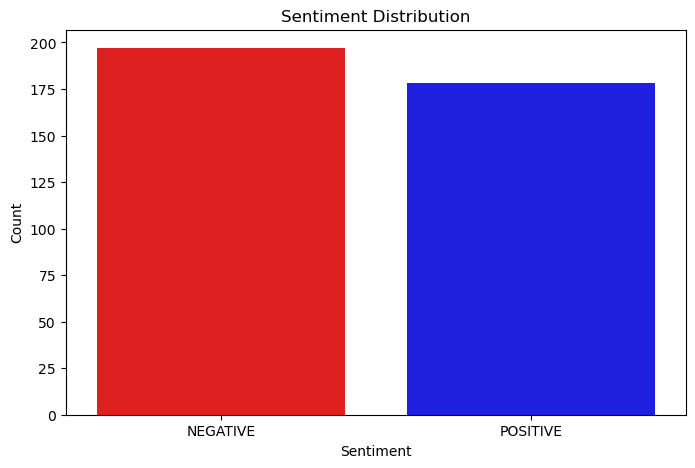

In [31]:
# Count occurrences of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue"]) 
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
